
# 🌤️ Modelo de Regresión Lineal con Datos de una API Pública (Open-Meteo)

Este notebook descarga datos históricos de temperatura desde la **API pública de Open-Meteo**, 
entrena un modelo de **regresión lineal** y evalúa su desempeño con métricas clásicas de regresión.

Incluye visualizaciones, ajuste del modelo y análisis de errores.


In [1]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:

# --- Descarga de datos desde la API pública Open-Meteo ---
# Datos de temperatura horaria de Bogotá (Colombia) últimos 5 días

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 4.61,
    "longitude": -74.08,
    "start_date": "2025-10-15",
    "end_date": "2025-10-20",
    "hourly": "temperature_2m",
    "timezone": "America/Bogota"
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame({
    "datetime": data["hourly"]["time"],
    "temperature": data["hourly"]["temperature_2m"]
})
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df.head()


,datetime,temperature,hour
0,2025-10-15 00:00:00,8.8,0
1,2025-10-15 01:00:00,8.8,1
2,2025-10-15 02:00:00,8.8,2
3,2025-10-15 03:00:00,8.0,3
4,2025-10-15 04:00:00,8.0,4


In [3]:

# --- Preparación del conjunto de datos ---
X = df[["hour"]].values
y = df["temperature"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño entrenamiento:", X_train.shape[0], " | Tamaño prueba:", X_test.shape[0])


Tamaño entrenamiento: 115  | Tamaño prueba: 29


In [4]:

# --- Entrenamiento del modelo de regresión lineal ---
model = LinearRegression()
model.fit(X_train, y_train)

print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)


Coeficiente: 0.1032498062187885
Intercepto: 10.949710916553363


In [5]:

# --- Predicciones y evaluación del modelo ---
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


MAE: 2.543
MSE: 8.651
RMSE: 2.941
R²: 0.081


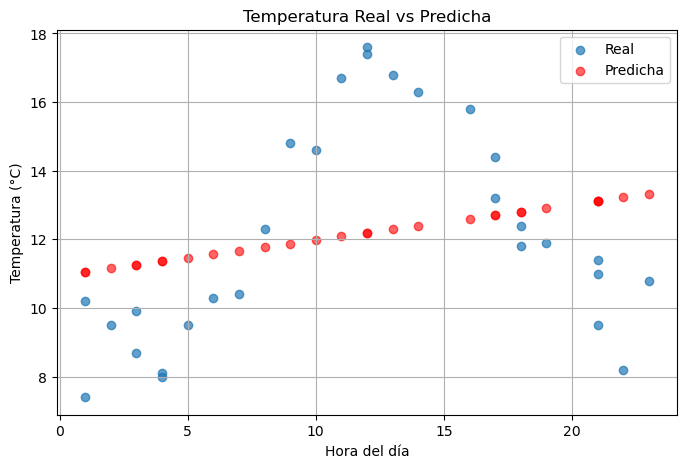

In [6]:

# --- Visualización: temperatura real vs predicha ---
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label="Real", alpha=0.7)
plt.scatter(X_test, y_pred, label="Predicha", color="red", alpha=0.6)
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura Real vs Predicha")
plt.legend()
plt.grid(True)
plt.show()


In [7]:

# --- Ajuste extendido con polinomio (para no linealidad) ---
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_p = model_poly.predict(X_test_p)

r2_poly = r2_score(y_test_p, y_pred_p)
rmse_poly = np.sqrt(mean_squared_error(y_test_p, y_pred_p))

print(f"Modelo Polinómico (grado 3) → R²: {r2_poly:.3f} | RMSE: {rmse_poly:.3f}")


Modelo Polinómico (grado 3) → R²: 0.716 | RMSE: 1.634


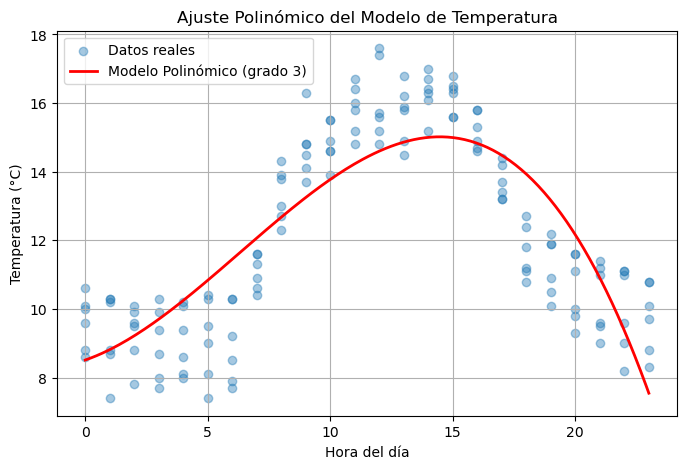

In [8]:

# --- Visualización del modelo polinómico ---
X_range = np.linspace(0, 23, 200).reshape(-1, 1)
y_range_pred = model_poly.predict(poly.transform(X_range))

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.4, label="Datos reales")
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Modelo Polinómico (grado 3)")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (°C)")
plt.title("Ajuste Polinómico del Modelo de Temperatura")
plt.legend()
plt.grid(True)
plt.show()
